<a href="https://colab.research.google.com/github/aubreyphenyo/AUBREY/blob/main/lstm_ARTIFICIAL_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#description:this program uses artificial reccurent neural network called long short term memory(lstm)
# to predict the closing price of the currency pair BWP\ZAR using the daily data of the past 10 years(1-1-2001 to 12-05-2021)

In [ ]:
#import the libraries
import pandas_datareader as web
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense,LSTM 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [ ]:
#get the stock quote 
import pandas_datareader as web
dat= web.DataReader('BWPZAR=X',data_source='yahoo',start='2008-10-19',end='2021-5-12')
dat.shape
dat

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-10-19,1.290700,1.243200,1.254400,1.275300,0.0,1.275300
2008-10-20,1.326100,1.262300,1.275400,1.311000,0.0,1.311000
2008-10-21,1.410300,1.284700,1.317000,1.376000,0.0,1.376000
2008-10-22,1.394300,1.279300,1.376000,1.289000,0.0,1.289000
2008-10-23,1.331600,1.257700,1.289100,1.307100,0.0,1.307100
...,...,...,...,...,...,...
2021-05-06,1.324157,1.301027,1.314646,1.314763,0.0,1.314763
2021-05-09,1.313332,1.294680,1.303158,1.303620,0.0,1.303620
2021-05-10,1.314044,1.301605,1.307244,1.307148,0.0,1.307148


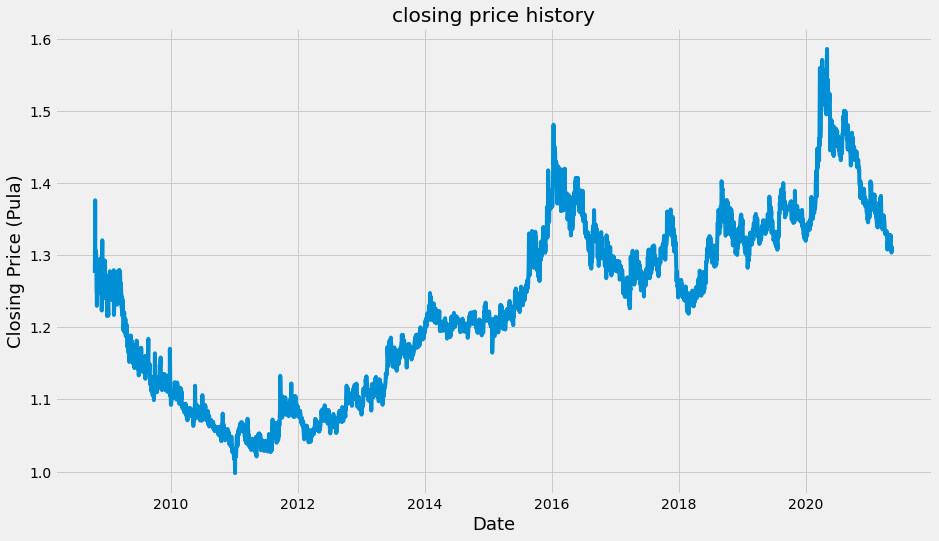

In [ ]:
 #ploting the closing price of pula
import matplotlib.pyplot as plt 
import pandas as pd
plt.figure(figsize=(14,8))
plt.title('closing price history')
plt.plot(dat['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price (Pula)',fontsize=18)
plt.show()

In [ ]:
#creating a new data frame with only the closing price 
data=dat.filter(['Close'])
#convert the data frame to a numpy array
dataset=data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
#printing the training data set
training_data_len 



2605

In [ ]:
#scaling the data 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
 
scaled_data

array([[0.47184377],
       [0.53258517],
       [0.64317896],
       ...,
       [0.5260312 ],
       [0.52593932],
       [0.5350047 ]])

In [ ]:
#creating the training data set form the scaled training data set 
train_data=scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.47184377, 0.53258517, 0.64317896, 0.49515354, 0.52594966,
       0.51437977, 0.49141035, 0.42743609, 0.42539442, 0.39442812,
       0.45431886, 0.42216155, 0.46469775, 0.48341347, 0.46282606,
       0.43594329, 0.45414869, 0.47235409, 0.4662289 , 0.43032861,
       0.46554841, 0.45585021, 0.47575713, 0.50604274, 0.48086129,
       0.45908287, 0.45193685, 0.42505408, 0.44155816, 0.38336874,
       0.54891908, 0.45074585, 0.45312786, 0.48171215, 0.47762862,
       0.44819367, 0.47201395, 0.46044405, 0.44581166, 0.47762862,
       0.50127873, 0.49821603, 0.48664634, 0.41212321, 0.42063041,
       0.45585021, 0.42573477, 0.45142633, 0.45550986, 0.44428031,
       0.3702677 , 0.39953248, 0.38830293, 0.43696412, 0.40293532,
       0.37162888, 0.42182141, 0.45244737, 0.45278751, 0.42505408])]
[0.4692915941135367]

[array([0.47184377, 0.53258517, 0.64317896, 0.49515354, 0.52594966,
       0.51437977, 0.49141035, 0.42743609, 0.42539442, 0.39442812,
       0.45431886, 0.42216155, 0.464

In [ ]:
#converting the x_train and y_train to numpy arrays 
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
#reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2545, 60, 1)

In [ ]:
#bulding the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#training the model
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
80/80 [==============================] - 5s 62ms/step - loss: 3.1126e-04
Epoch 2/100
80/80 [==============================] - 5s 63ms/step - loss: 3.2783e-04
Epoch 3/100
80/80 [==============================] - 5s 61ms/step - loss: 3.0230e-04
Epoch 4/100
80/80 [==============================] - 5s 64ms/step - loss: 3.0313e-04
Epoch 5/100
80/80 [==============================] - 5s 63ms/step - loss: 3.0342e-04
Epoch 6/100
80/80 [==============================] - 5s 64ms/step - loss: 3.2377e-04
Epoch 7/100
80/80 [==============================] - 5s 62ms/step - loss: 3.1750e-04
Epoch 8/100
80/80 [==============================] - 5s 62ms/step - loss: 3.2680e-04
Epoch 9/100
80/80 [==============================] - 5s 63ms/step - loss: 2.9871e-04
Epoch 10/100
80/80 [==============================] - 5s 63ms/step - loss: 3.0521e-04
Epoch 11/100
80/80 [==============================] - 5s 63ms/step - loss: 3.0308e-04
Epoch 12/100
80/80 [==============================] - 5s 62ms/s

In [ ]:
#creating the testing data set
#creating a new array containing scaled values from index 2840 to 3255
test_data=scaled_data[training_data_len-60:,:]
#creating the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#converting the data to a numpy array
x_test=np.array(x_test)



In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
#making the models to predict price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

array([[0.9807077 ],
       [0.9805919 ],
       [0.9805699 ],
       [0.9806141 ],
       [0.98064363],
       [0.98064446],
       [0.98075104],
       [0.9808652 ],
       [0.98094094],
       [0.9810269 ],
       [0.9810538 ],
       [0.9810708 ],
       [0.9810248 ],
       [0.98093647],
       [0.9808292 ],
       [0.98075324],
       [0.98068815],
       [0.98069954],
       [0.98079526],
       [0.9809328 ],
       [0.98109317],
       [0.98121965],
       [0.981274  ],
       [0.9812696 ],
       [0.98127574],
       [0.98128885],
       [0.98129094],
       [0.98126435],
       [0.98126954],
       [0.98133034],
       [0.98142284],
       [0.981506  ],
       [0.9815704 ],
       [0.9816275 ],
       [0.981711  ],
       [0.9818351 ],
       [0.9819527 ],
       [0.98209864],
       [0.9822585 ],
       [0.9823985 ],
       [0.98246735],
       [0.98244214],
       [0.9823928 ],
       [0.9823667 ],
       [0.9823414 ],
       [0.9822966 ],
       [0.9822439 ],
       [0.982

In [ ]:
#the root mean squared error 
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.40437279593463904

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


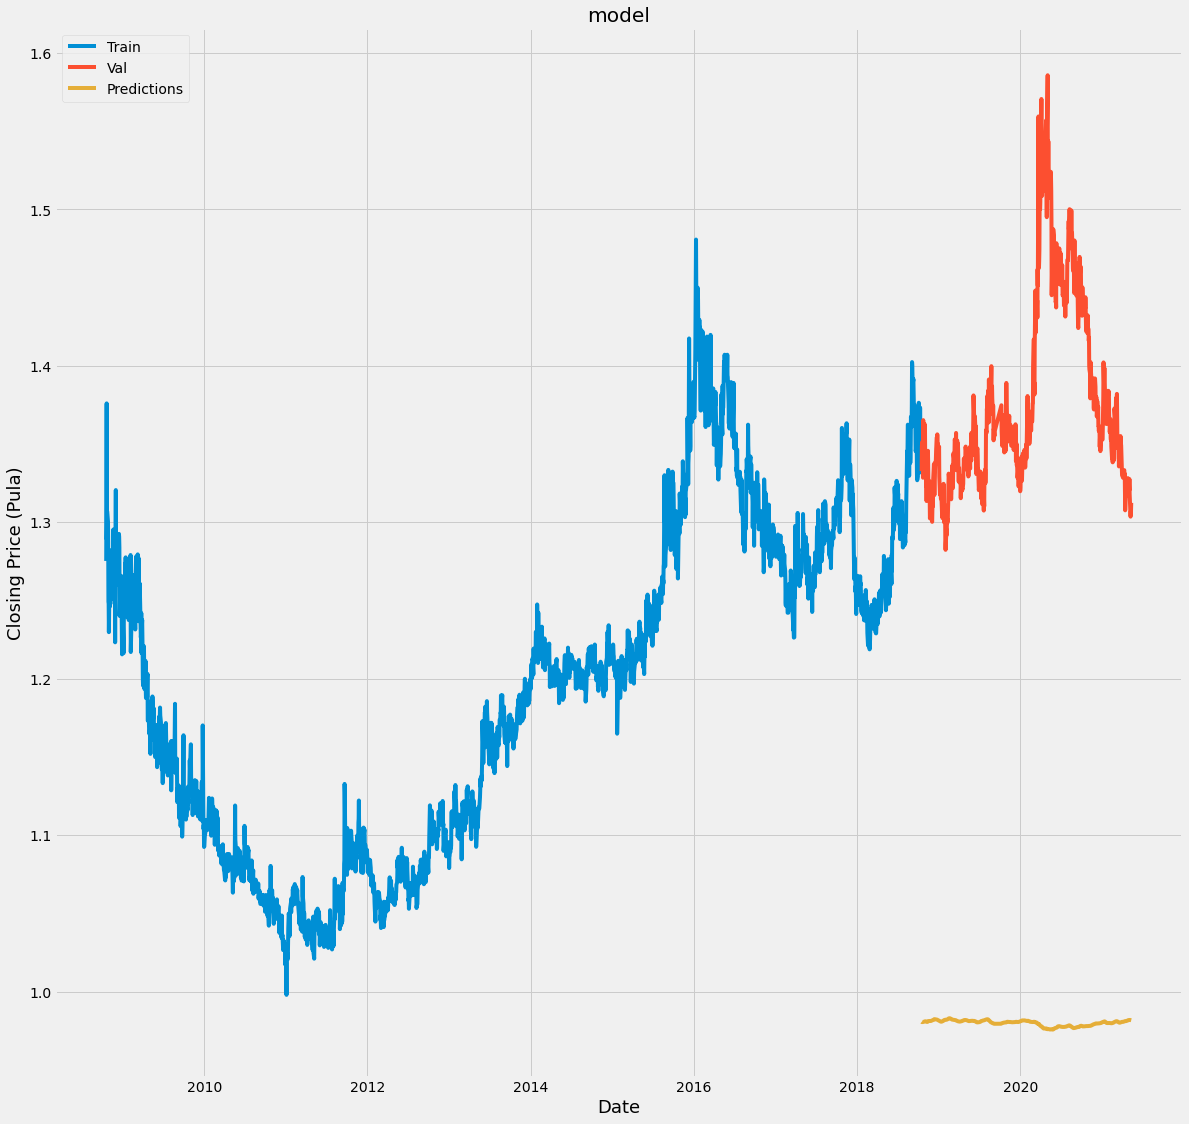

In [ ]:

#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualization of the data
plt.figure(figsize=(18,18))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price (Pula)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='upper left')     
plt.show()


In [ ]:
#getting the data from the model
valid

,Close,Predictions
Date,,
2018-10-17,1.332800,0.980708
2018-10-18,1.349100,0.980592
2018-10-21,1.351700,0.980570
2018-10-22,1.336800,0.980614
2018-10-23,1.328500,0.980644
...,...,...
2021-05-06,1.314763,0.981933
2021-05-09,1.303620,0.981901
2021-05-10,1.307148,0.981837


In [ ]:
#get the quote
BWPZAR_quote=web.DataReader('BWPZAR=X',data_source='yahoo',start='2021-5-12',end='2021-5-12')
new_dat=BWPZAR_quote.filter(['Close'])
#getting the last 60 days closing price values 
last_60_days=new_dat[-60:].values
#scale the data between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#creating an empty list
X_test=[]
#appending the past 60 days 
X_test.append(last_60_days_scaled)
#converting X_test data set to a numpy array
X_test=np.array(X_test)
#reshaping the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price 
predicted_price=model.predict(X_test)
#undo the scaling 
predicted_price=scaler.inverse_transform(predicted_price)
print(predicted_price)

[[0.99995315]]


In [ ]:
#get the closing price of pula for the next day
BWPZAR_quote2=web.DataReader('BWPZAR=X',data_source='yahoo',start='2021-5-12',end='2021-5-12')
print(BWPZAR_quote2['Close'])

Date
2021-05-11    1.307094
2021-05-12    1.312422
Name: Close, dtype: float64
